In [1]:
import numpy as np
import pandas as pd
import os
import sys
import pylab as pl
import zipfile
from pandas import DataFrame
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False

try:
    from urllib import urlretrieve as urlretrieve
except ImportError:
    from urllib.request import urlretrieve as urlretrieve
%pylab inline

puidata = os.getenv("PUIDATA")
if puidata is None:
    os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

puidata = os.getenv("PUIDATA")

def myregression(x, y, method=None): 
    if method == None or method == 'O':
        rm = sm.OLS(y, x)
    elif method == 'W':
        rm = sm.WLS(y, x)
    else:
        print ("Problem in the way you called myregression")
        return -1
            
    reg = rm.fit()
    print ("linear regression slope {}".format(reg.summary()))
    return reg

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# Gathering the data

In [2]:
import urllib
url = "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
urllib.request.urlretrieve(url,"population_worldbank.gz")

In [3]:
!unzip -d $PUIDATA population_worldbank.gz

In [4]:
url = "http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=csv"
urllib.request.urlretrieve(url,"gdp_worldbank.gz")
!unzip -d $PUIDATA gdp_worldbank.gz

In [5]:
pop = pd.read_csv(puidata +"/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv", skiprows=4)
pop.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [6]:
pop = pop[['Country Name', '2012']]
pop = pop.rename(index=str, columns={'2012': 'pop'})
pop.head()

,Country Name,pop
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [7]:
gdp = pd.read_csv(puidata +"/API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv", skiprows=4)
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105264.0,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530081.0,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784193.0,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,76965.0,NaN


In [8]:
gdp = gdp[['Country Name', '2012']]
gdp = gdp.rename(index=str, columns={'2012': 'gdp'})
gdp.head()

,Country Name,gdp
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [9]:
df_guns = pd.read_csv("https://s3.us-east-2.amazonaws.com/pui2018hw7/data-pvLFI.csv")
df_guns.rename(columns={"Guns per 100 inhabitants":"Guns/100 inhabitants",\
                        "Number of mass shootings (1983-2013)":"Number of mass shootings"}, inplace=True)
df_guns.head()

,Country,Guns/100 inhabitants,Number of mass shootings
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [10]:
df_bianco = pd.read_csv("https://github.com/fedhere/PUI2018_fb55/raw/master/HW9_fb55/World%20firearms%20murders%20and%20ownership%20-%20Sheet%201.csv")
df_bianco.rename(columns={"Country/Territory":"Country"},inplace=True)
df_bianco = df_bianco[["Country","Number of homicides by firearm","Average total all civilian firearms"]]
df_bianco.head()

,Country,Number of homicides by firearm,Average total all civilian firearms
0,Albania,56.0,270000.0
1,Algeria,20.0,1900000.0
2,Angola,NaN,2800000.0
3,Anguilla,1.0,NaN
4,Argentina,1198.0,3950000.0


In [11]:
df_ = df_guns.merge(df_bianco, on='Country')
df_.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Number of homicides by firearm,Average total all civilian firearms
0,Australia,15.0,4,30.0,3050000.0
1,Austria,30.4,1,18.0,2500000.0
2,Belgium,17.2,2,70.0,1800000.0
3,Canada,30.8,4,173.0,9950000.0
4,Denmark,12.0,0,15.0,650000.0


In [12]:
df_ = df_.merge(gdp, left_on='Country', right_on='Country Name')
df_.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Number of homicides by firearm,Average total all civilian firearms,Country Name,gdp
0,Australia,15.0,4,30.0,3050000.0,Australia,22742475.0
1,Austria,30.4,1,18.0,2500000.0,Austria,8429991.0
2,Belgium,17.2,2,70.0,1800000.0,Belgium,11128246.0
3,Canada,30.8,4,173.0,9950000.0,Canada,34750545.0
4,Denmark,12.0,0,15.0,650000.0,Denmark,5591572.0


In [13]:
df_ = df_.merge(pop, on="Country Name")
df_.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Number of homicides by firearm,Average total all civilian firearms,Country Name,gdp,pop
0,Australia,15.0,4,30.0,3050000.0,Australia,22742475.0,22742475.0
1,Austria,30.4,1,18.0,2500000.0,Austria,8429991.0,8429991.0
2,Belgium,17.2,2,70.0,1800000.0,Belgium,11128246.0,11128246.0
3,Canada,30.8,4,173.0,9950000.0,Canada,34750545.0,34750545.0
4,Denmark,12.0,0,15.0,650000.0,Denmark,5591572.0,5591572.0


In [14]:
df_ = df_.drop('Country Name', axis=1)
df_.head()

,Country,Guns/100 inhabitants,Number of mass shootings,Number of homicides by firearm,Average total all civilian firearms,gdp,pop
0,Australia,15.0,4,30.0,3050000.0,22742475.0,22742475.0
1,Austria,30.4,1,18.0,2500000.0,8429991.0,8429991.0
2,Belgium,17.2,2,70.0,1800000.0,11128246.0,11128246.0
3,Canada,30.8,4,173.0,9950000.0,34750545.0,34750545.0
4,Denmark,12.0,0,15.0,650000.0,5591572.0,5591572.0


# Exploration

# plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

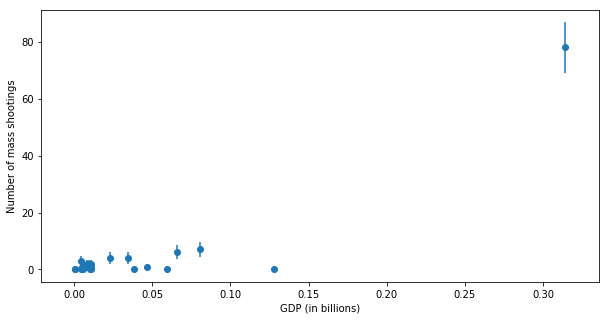

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP and the highest number of mass shootings


In [15]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
pl.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP and the highest number of mass shootings")

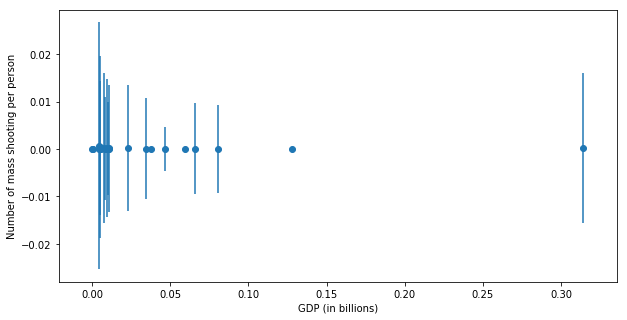

Number of mass shootings per person vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP, but similar shootings per person as other countries


In [16]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

df_['shootingspp'] = df_["Number of mass shootings"] / df_['pop'] * 1e3

scatter = ax.scatter(df_.gdp  / 1e9, df_['shootingspp'])
ax.errorbar(df_.gdp / 1e9, df_['shootingspp'], 
            yerr = np.sqrt(df_['shootingspp'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shooting per person")
ax.set_ylim()
pl.show()
print ("Number of mass shootings per person vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP, but similar shootings per person as other countries")

# plot the average number of civilian fire arms per person

Text(0,0.5,'N')

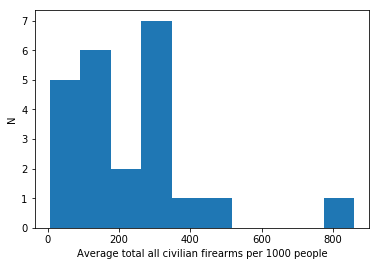

In [17]:
fig, ax = plt.subplots()
ax.hist(df_['Average total all civilian firearms'] / df_['pop'] * 1e3)
ax.set_xlabel('Average total all civilian firearms per 1000 people');
ax.set_ylabel('N')

The plot is showing the distribution of the number of civilian fire arms per 1000 people

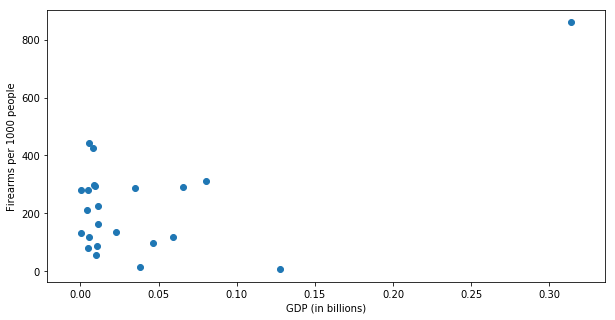

Firearms per 1000 people vs GDP, The datapoint to the top right of the plot is the USA, which has noth the highest GDP, but also the highest number of firearms per 1000 people


In [18]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

df_['firearms per 1000 people'] = df_["Average total all civilian firearms"] / df_['pop'] * 1e3

scatter = ax.scatter(df_.gdp  / 1e9, df_['firearms per 1000 people'])
#ax.errorbar(df_.gdp / 1e9, df_['firearms per 1000 people'], 
            #yerr = np.sqrt(df_['firearms per 1000 people'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Firearms per 1000 people")
ax.set_ylim()
pl.show()
print ("Firearms per 1000 people vs GDP, " + 
       #"errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP, but also the highest number of firearms per 1000 people")

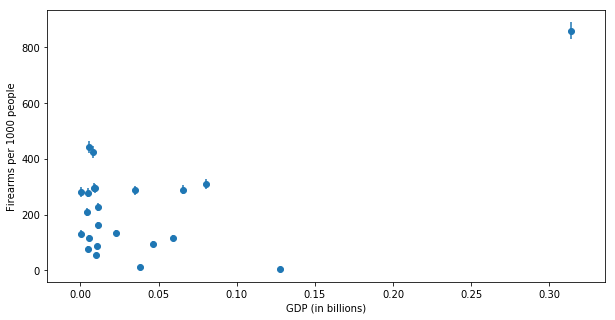

Firearms per 1000 people vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP, but also the highest number of firearms per 1000 people


In [19]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

df_['firearms per 1000 people'] = df_["Average total all civilian firearms"] / df_['pop'] * 1e3

scatter = ax.scatter(df_.gdp  / 1e9, df_['firearms per 1000 people'])
ax.errorbar(df_.gdp / 1e9, df_['firearms per 1000 people'], 
            yerr = np.sqrt(df_['firearms per 1000 people'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Firearms per 1000 people")
ax.set_ylim()
pl.show()
print ("Firearms per 1000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP, but also the highest number of firearms per 1000 people")

# plot the average number of homicide by fire arms per person

Text(0,0.5,'N')

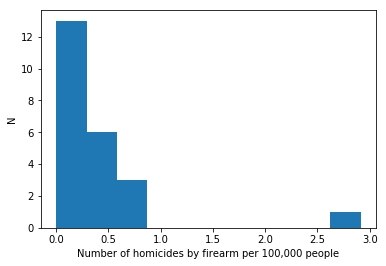

In [20]:
fig, ax = plt.subplots()
ax.hist(df_['Number of homicides by firearm'] / df_['pop'] * 1e5)
ax.set_xlabel('Number of homicides by firearm per 100,000 people');
ax.set_ylabel('N')

The plot is showing the distribution of the number of homicides by firearm per 1000 people

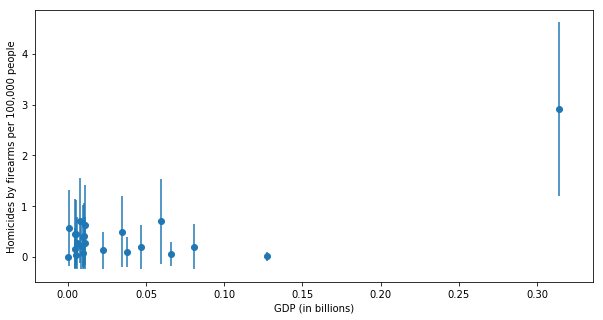

Homicides by firearms per 100,000 people vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has noth the highest GDP, but also the highest number of firearms per 100,000 people


In [21]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

df_['homicides by firearms per 100000 people'] = df_["Number of homicides by firearm"] / df_['pop'] * 100000

scatter = ax.scatter(df_.gdp  / 1e9, df_['homicides by firearms per 100000 people'])
ax.errorbar(df_.gdp / 1e9, df_['homicides by firearms per 100000 people'], 
            yerr = np.sqrt(df_['homicides by firearms per 100000 people'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Homicides by firearms per 100,000 people")
ax.set_ylim()
pl.show()
print ("Homicides by firearms per 100,000 people vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has noth the highest GDP, but also the highest number of firearms per 100,000 people")

# plot the number of homicides by fire arm against the number of civilian firearms. plot the US in a different color

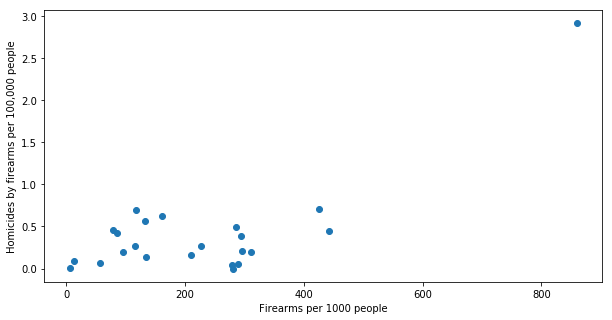

Homicides by firearms per 100,000 people vs number of firearms per 1000 people, 


In [22]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['firearms per 1000 people'], df_['homicides by firearms per 100000 people'])
#ax.errorbar(df_['firearms per 1000 people', df_['homicides by firearms per 100000 people'], 
            #yerr = np.sqrt(df_['homicides by firearms per 100000 people'] * 1.0), fmt = '.')
ax.set_xlabel('Firearms per 1000 people')
ax.set_ylabel("Homicides by firearms per 100,000 people")
ax.set_ylim()
pl.show()
print ("Homicides by firearms per 100,000 people vs number of firearms per 1000 people, " + 
       #"errors represent Poisson statistics.\n" +
      '')

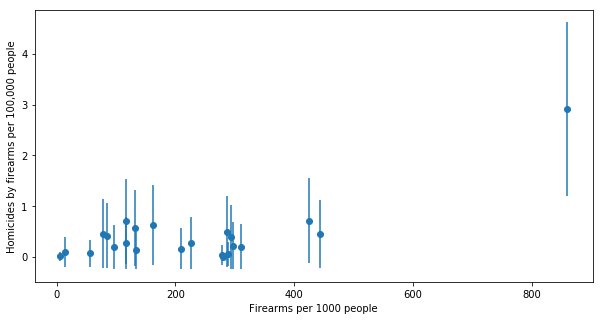

Homicides by firearms per 100,000 people vs number of firearms per 1000 people, errors represent Poisson statistics.



In [23]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['firearms per 1000 people'], df_['homicides by firearms per 100000 people'])
ax.errorbar(df_['firearms per 1000 people'], df_['homicides by firearms per 100000 people'], \
            yerr = np.sqrt(df_['homicides by firearms per 100000 people'] * 1.0), fmt = '.')
ax.set_xlabel('Firearms per 1000 people')
ax.set_ylabel("Homicides by firearms per 100,000 people")
ax.set_ylim()
pl.show()
print ("Homicides by firearms per 100,000 people vs number of firearms per 1000 people, " + 
       "errors represent Poisson statistics.\n" +
      '')

# plot the number of mass shootings against the number of civilian firearms. plot the US in a different color

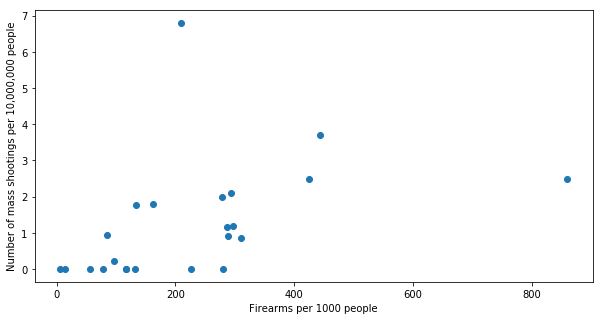

Number of mass shootings per 10,000,000 vs number of firearms per 1000 people, 


In [24]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

df_['Number of mass shootings per 10000000 people'] = df_['Number of mass shootings'] / df_['pop'] * 1e7

ax.scatter(df_['firearms per 1000 people'], df_['Number of mass shootings per 10000000 people'])
#ax.errorbar(df_['firearms per 1000 people'], df_['Number of mass shootings'], 
            #yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel('Firearms per 1000 people')
ax.set_ylabel("Number of mass shootings per 10,000,000 people")
ax.set_ylim()
pl.show()
print ("Number of mass shootings per 10,000,000 vs number of firearms per 1000 people, " + 
       #"errors represent Poisson statistics.\n" +
      '')

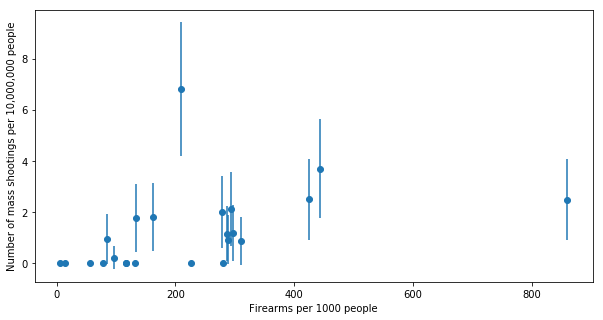

Number of mass shootings per 10,000,000 people vs number of firearms per 1000 people, errors represent Poisson statistics.



In [25]:
fig = pl.figure(figsize=(10,5)) 
ax = fig.add_subplot(111)

ax.scatter(df_['firearms per 1000 people'], df_['Number of mass shootings per 10000000 people'])
ax.errorbar(df_['firearms per 1000 people'], df_['Number of mass shootings per 10000000 people'], 
            yerr = np.sqrt(df_['Number of mass shootings per 10000000 people'] * 1.0), fmt = '.')
ax.set_xlabel('Firearms per 1000 people')
ax.set_ylabel("Number of mass shootings per 10,000,000 people")
ax.set_ylim()
pl.show()
print ("Number of mass shootings per 10,000,000 people vs number of firearms per 1000 people, " + 
       "errors represent Poisson statistics.\n" +
      '')

# Modeling

# fit a line to the Number of mass shootings per person as a function of Average total all civilian firearms per person.

linear regression slope                                          OLS Regression Results                                         
Dep. Variable:     Number of mass shootings per 10000000 people   R-squared:                       0.192
Model:                                                      OLS   Adj. R-squared:                  0.153
Method:                                           Least Squares   F-statistic:                     4.981
Date:                                          Tue, 13 Nov 2018   Prob (F-statistic):             0.0367
Time:                                                  23:44:01   Log-Likelihood:                -40.676
No. Observations:                                            23   AIC:                             85.35
Df Residuals:                                                21   BIC:                             87.62
Df Model:                                                     1                                         
Covariance Type:               

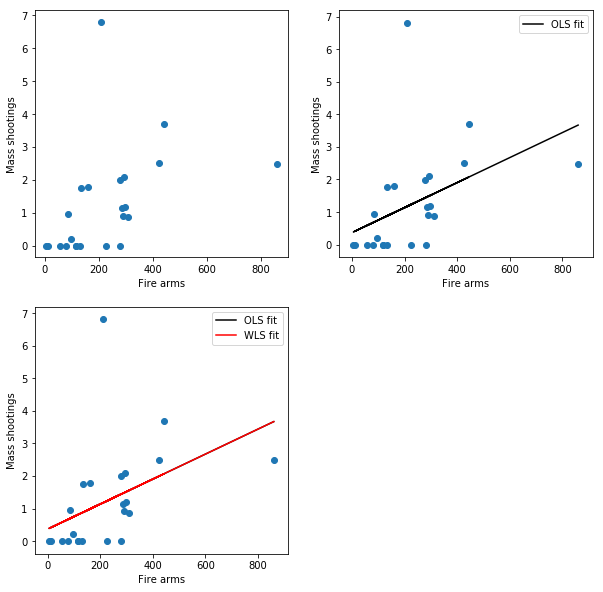

In [33]:
fig = pl.figure(figsize=(10,10))

shootings = df_['Number of mass shootings per 10000000 people']
firearms = df_['firearms per 1000 people']

firearms_c = sm.add_constant(firearms)

rm_ols = myregression(firearms_c, shootings,  method='O')
beta0_ols, beta1_ols = rm_ols.params

rm_wls = myregression(firearms_c, shootings, method='W')
beta0_wls, beta1_wls = rm_wls.params

firearms_c = firearms_c.drop('const', axis=1)

ax = fig.add_subplot(221)
ax.scatter(firearms, shootings, label=None)
ax.set_xlabel('Fire arms')
ax.set_ylabel('Mass shootings')

ax2 = fig.add_subplot(222)
pl.plot(firearms, beta1_ols*firearms_c + beta0_ols,'k-', label = "OLS fit")
#pl.plot(firearms, beta1_wls*firearms_c + beta0_wls,'r-', label = "WLS fit")
ax2.scatter(firearms, shootings, label=None)
ax2.set_xlabel('Fire arms')
ax2.set_ylabel('Mass shootings')
ax2.legend()

ax3 = fig.add_subplot(223)
pl.plot(firearms, beta1_ols*firearms_c + beta0_ols,'k-', label = "OLS fit")
pl.plot(firearms, beta1_wls*firearms_c + beta0_wls,'r-', label = "WLS fit")
ax3.scatter(firearms, shootings, label=None)
#ax3.errorbar(firearms_c, shootings, \
 #            yerr = np.sqrt(df_['Number of mass shootings per 10000000 people'] * 1.0), fmt = '.')
ax3.set_xlabel('Fire arms')
ax3.set_ylabel('Mass shootings')
ax3.legend()

Plots showing mass shootings against firearms. My WLS and OLS line is the same, which indicates an error, but I wasn't able to figure out what the error was.

However, the plot does indicate that as firearms ownership increases per person, mass shootings per person also increase

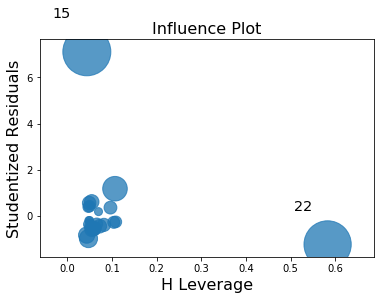

In [34]:
sm.graphics.influence_plot(rm_ols, alpha  = 0.05, criterion="cooks");